<h3 align="center">Twitter Analytics Regarding Climate Change </h3>

# <h2 align="center">Problem statement:</h2>

Build a machine learning model that is able to classify whether or not an individual believes in man-made climate change based on historical tweet data to increase insights about customers and inform future marketing strategies.

You can find the project overview [here](https://www.kaggle.com/competitions/edsa-sentiment-classification).

According to <a href="https://www.un.org/en/climatechange/what-is-climate-change" target="_blank">United Nations</a> , “Climate change refers to long-term shifts in temperatures and weather patterns. These shifts may be natural, such as through variations in the solar cycle.”

<c> The corparations have reconsidered that consumers support products and services that align with their personal beliefs. 

The need for companies to have deep and insightful data(Add something here) as they determine the possible prediction of the the product or service that large and small corperations can rely on. 

Data that was funded by  a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The Data was collected between 27 April 2015 - 21 Febuary 2018. A total of 43 943 tweets made up the collection. </c>

The collection of tweets is divided into 4 sentiments:
* Climate change does exist (Pro)
* Climate change does not exist (Anti)
* No views on climate change (Neutral)
* News report (News)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn import metrics
from nltk.tokenize import WhitespaceTokenizer
import matplotlib.pyplot as plt
from IPython.display import display_html
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB # Read online that this is specifically intended for unbalanced data
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'numpy'

# <h2 align="center">Comet Initialisation:</h2>

In [ ]:
#!pip install comet_ml

In [ ]:
#from comet_ml import Experiment

In [ ]:
#experiment = Experiment(api_key='0119e2G7ZqSVkLWbLNPH5JgTS',
                        #project_name="general", workspace="pauuuuul")

# <h2 align="center">Reading in the Data:</h2>

The data has been collected from content generated on the social media platform called 'Twitter' where users write 240-character posts (commonly referred to as 'tweets) on any and every subject. 

The data has a specific focus on climate change tweets and with the use of technical analysys, the *Data Whispers* will determine the users' general sentiment on climate change and whether there is a belief in whether climate hange is indeed real. 

The code written in the below cell pulls imports the relevant documentcontaining tabular data 

In [ ]:
train_df = pd.read_csv("resources/train.csv")

We begin by taking a look a small snippet of the data in it's raw, tabular form.  At a glance, it is easy to see the table contains three columns, namely, 'sentiment', 'message' and 'tweetid'.

The sentiment of each tweet is classified according to numbers ranging from -1 to 2.  This will be discussed in greater detail further down in the notebook.

Each row in the 'message' column contains actual tweets from various users while in the 'tweetid' column, each tweet is given a unique ID.

In [ ]:
train_df.head() # Brief observation of train dataframe

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504


To get a better idea of how much data the Data Whisperers have been provided with, we analyse the 'shape' of the data, which is presented in the following format: *(number of rows, number of columns).

In [ ]:
train_df.shape # Checking number of features and series of the dataframe

(30759, 3)

One is now able to see that the tabular data (which shall be referred to as the 'dataframe') contains 30759 rows and 3 columns. The bigger the sampple, the bigger the smiles at Data Whisperers Inc!

We all know the saying, "do not judge a book by its cover"... It is with that in mind that we do our following step which is to confirm that we indeed have 30759 rows of data to work with. To do this, we simply check if there are any empty cells (what we Data Scientists refer to as 'null values').

In [ ]:
train_df.info() # Overview of dataframe showing data type, number of non-null rows and the name of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30759 entries, 0 to 30758
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  30759 non-null  int64 
 1   message    30759 non-null  object
 2   tweetid    30759 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 721.0+ KB


The output above indicates that out of the 30759 entries, there are 30759 non-null values.  In other words, we have no empty cells.  It is also clear to see that, as previously discussed, the sentiment of each tweet is categorised via 'int64' datatypes, which means it is categorised via numbers at this point but this will be addressed later on.

Attention to detail is important, therefore it is in that spirit that we double-check that there are indeed no null values using an alternative method in the cell below.

In [ ]:
train_df.isnull().sum() # Summarised table checking for null-values

sentiment    0
message      0
tweetid      0
dtype: int64

The data above shows that there are indeed 3 columns (what we call 'features'): 'sentiment', 'message' and 'tweetid'. The output above also shows that none of the features contain null values.

# <h2 align="center">Data Preprocessing:</h2>

It's at this point that the *Data Whisperers* have to get their hands dirty...


A copy of dataframe is created in the below cell to be used for pre-processing. 

In [ ]:
#This is to avoid overfitting since pre-processing data before splitting it in to the train and test set can lead to this. This is also a safety precaution should there be a large error that is irreversible, there is an clear, clean data set.

In [ ]:
#Below, are techniques that assist in <a href="https://towardsdatascience.com/effectively-pre-processing-the-text-data-part-1-text-cleaning-9ecae119cb3e" target="_blank">text cleaning</a>, get rid of all the tags, HTML entities, punctuation, non-alphabets, and any other kind of characters which might not be a part of the language.

In [ ]:
copy_train_df = train_df.copy()

For the tweets to be useful for later analysis, the content of the tweets needs to be pre-processed. We begin by reating a fucntion to deal with the removal of punctuation marks as they do not add value in this context. Meaningless data that has the potential to corrupt, slow down or distort our process.  

Put differently, meaningless data simply adds noise, which is something *Whisperers* would obviously love to avoid!

In [ ]:
# Function to remove punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

A vital step in pre-processing the tweets is to ensure all words are changed into lowercase format. For example, the word 'climate' and 'Climate' should be read as the same word in our analysis. In this way, our data is becoming, what we call, 'cleaner'.

In [ ]:
# Convert messages to lowercase
copy_train_df["message"] = copy_train_df["message"].str.lower()

The function to remove punction marks will now be put to use on 'message' column and all of its contents as the *Whisperers* continue the process of noise removal.

In [ ]:
# Apply remove punctuation function to train_df["message"] series
copy_train_df['message'] = copy_train_df['message'].apply(remove_punctuations)

 <a href="https://www.geeksforgeeks.org/removing-stop-words-nltk-python/" target="_blank">Stop Words</a> are words that are insignificant or redundant than need to be filtered out or ignored. The coding technique below illustrates the removeal of Stop words from the tweets in the "message" column. 
 
**Please note:** The languguage used to identify the stop words will be English.

In [ ]:
# Exclude stopwords using Python's list comprehension and pandas.DataFrame.apply by only keeping words not in English stopwords
copy_train_df["message"] = copy_train_df["message"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words("english"))]))

 <a href="https://www.geeksforgeeks.org/removing-stop-words-nltk-python/" target="_blank">Tokenisation</a> is the "breaking up" of a sentence into individual words, also known as, tokens. 
 
By analyzing the words present in the tweets, on an individual basis, we can easily interpret the meaning of the text. We have already imported the tokenisation package for this purpose `from nltk.tokenize import word_tokenize, TreebankWordTokenizer` then invoked the tokernizer method `TreebankWordTokenizer()` below.

<img src= /Users/tsheg/Music/AdvancedClassificationSprint/2207FTDS_Team_ES4_Classification_Sprint/NLP_Tokenization.png" width="300" />

In [ ]:
tokeniser = TreebankWordTokenizer()
copy_train_df['tokens'] = copy_train_df['message'].apply(tokeniser.tokenize)

 Another weapon in our arsenal is the 'Bag of Words' package.  
 
<a href="https://youtu.be/IRKDrrzh4dE" target="_blank">Bag of Words</a> is a package that assists us in extracting words and counting the number of times a word occurs. This is exhibited below. 

In [ ]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

As has been previously discussed, sentiment has been labeled using numbers and not actual words. 

In [ ]:
sentiment_labels = list(copy_train_df["sentiment"].unique())

In [21]:
sentiment = {}
for i in sentiment_labels:
    df = copy_train_df.groupby('sentiment')
    sentiment[i] = {}
    for row in df.get_group(i)['tokens']:
        sentiment[i] = bag_of_words_count(row, sentiment[i])  

In [22]:
all_words = set()
for i in sentiment_labels:
    for word in sentiment[i]:
        all_words.add(word)

In [23]:
sentiment['all'] = {}
for i in sentiment_labels:    
    for word in all_words:
        if word in sentiment[i].keys():
            if word in sentiment['all']:
                sentiment['all'][word] += sentiment[i][word]
            else:
                sentiment['all'][word] = sentiment[i][word]

In [24]:
# Create index of wprds that appear 4 or more times
max_count = 4
remaining_word_index = [k for k, v in sentiment['all'].items() if v >= max_count]

In [25]:
hm = []
for p, p_bow in sentiment.items():
    df_bow = pd.DataFrame([(k, v) for k, v in p_bow.items() if k in remaining_word_index], columns=['Word', p])
    df_bow.set_index('Word', inplace=True)
    hm.append(df_bow)

# create one big dataframe
df_bow = pd.concat(hm, axis=1)
df_bow.fillna(0, inplace=True)

    Below are dataframes created and seperated to each sentiment (Anti, Pro, News and Neutral), displaying the top 10 words used in each sentiment. This assist in exhibiting which words are more likely to be used whilst expressing the user's belief regarding climate change to sentiment. Then placing each dataframe side by side assisting with comparasion and evaluation.  

In [26]:
# Create separte dataframes for each sentiment that displays top 10 most used words
df0 = pd.DataFrame(df_bow["all"].sort_values(ascending=False).head(10))
df1 = pd.DataFrame(df_bow[-1].sort_values(ascending=False).head(10))
df2 = pd.DataFrame(df_bow[0].sort_values(ascending=False).head(10))
df3 = pd.DataFrame(df_bow[1].sort_values(ascending=False).head(10))
df4 = pd.DataFrame(df_bow[2].sort_values(ascending=False).head(10))

# Style created dataframes so they can be displayed side by side
df0_style = df0.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("All")
df1_style = df1.style.set_table_attributes("style='display:inline'").set_caption("Anti")
df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Neutral")
df3_style = df3.style.set_table_attributes("style='display:inline'").set_caption("Pro")
df4_style = df4.style.set_table_attributes("style='display:inline'").set_caption("News")

    The message row of the main dataframe are tweets. Tweet is referred to as a messages posted on Twitter. When the tweet is forwarded or reposted on Twitter is Referred to as a Retweet. The importance of separating a tweet from a retweet can give insight on the value in which the user's message. The high the retweet the more likely the tweet get to be seen, resulting in higher engagement regardless of the sentiment. It is more likely that the tweet with similar sentiment as the original tweet will be retweeted.

Lemmatization

In [27]:
# Create lemmatization class and define lemmatization function within it
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, message):
        return [self.wnl.lemmatize(t) for t in word_tokenize(message)]

Separate Retwets and Tweets

In [28]:
# Create new column that is True if a retweet is present and False if a retweet is not.
copy_train_df['RT'] = copy_train_df["message"].str.startswith("rt").astype(str)

# <h2 align="center">Exploratory Data Analysis (EDA):</h2>

Exploratory Data Analysis(EDA) is The investigation and analysis of data. 
It helps determine how best to manipulate data sources to get the needed answers, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions. 

EDA is the poking and experimentation of data. This is where one can explore and ask questions to see the possible outcome from their exprimentation. 

Sentiment Description

2 News: the tweet links to factual news about climate change

1 Pro: the tweet supports the belief of man-made climate change

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1 Anti: the tweet does not believe in man-made climate change Variable definitions

In [29]:
copy_train_df["sentiment"].unique() # No values present that should not be there

array([-1,  0,  1,  2], dtype=int64)

Sentiment Frequency by Message

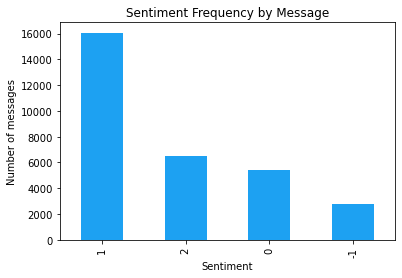

In [30]:
# Plot message count by sentiment
sum_sentiment = copy_train_df[['sentiment', 'message']].groupby('sentiment').count()
sum_sentiment.sort_values('message', ascending=False).plot.bar(color="#1DA1F2")
plt.title('Sentiment Frequency by Message')
plt.xlabel('Sentiment')
plt.ylabel('Number of messages')
plt.legend('', frameon=False)
plt.show()

    This bar graph can be referred to as a "voting plot" to sentiments. The sentiment that has the high number of tweets, exhibiting that 1, Pro climate change has a large amount of tweets. Whereas -1, Anti climate change, being the lowest amount. One can analyse and see that Pro Climate change tweets are more popular and showcase that many do believe in climate change

Next, we can check the amount of times individual words are used within the tweets. This will be called the word frequency.

Word Frequency 

In [31]:
# Display count of all words
total_words = sum([v for v in sentiment['all'].values()])
total_words

378148

    ###### There is a total of 378 148 unique words in the dataset. 

That is a lot of words to analyse, plotting the the word frequency distribution may help determine valuable insight.

Text(0.5, 0, 'Word Frequency')

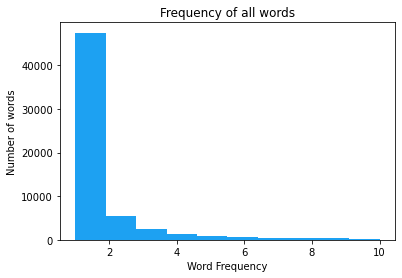

In [32]:
# Plot word frequency up to 10
_ = plt.hist([v for v in sentiment['all'].values() if v <= 10],color="#1DA1F2")
plt.title("Frequency of all words")
plt.ylabel("Number of words")
plt.xlabel("Word Frequency")

The above graph shows that there is a disproportionate amount of words that only appear once.

In [33]:
# Display count of words that appear one and two times.
display(len([v for v in sentiment['all'].values() if v == 1]))
display(len([v for v in sentiment['all'].values() if v == 2]))

47520

5400

In [34]:
# Dsiplay total count of words that appear les than 2 times and total count of words that appear 2 or more times 
print(len([v for v in sentiment['all'].values() if v <= 1]))
occurs_more_than_x_times = sum([v for v in sentiment['all'].values() if v > 1])
print(occurs_more_than_x_times)

47520
330628


In [35]:
# Display percentage of words that are left if all words that appear once are removed
print(round(occurs_more_than_x_times/total_words*100, 2), "%")

87.43 %


In [36]:
# Display top 10 most common words in each sentiment with their word count
display_html(df0_style._repr_html_() + 
                df1_style._repr_html_() + 
                df2_style._repr_html_() + 
                df3_style._repr_html_() + 
                df4_style._repr_html_(), 
                raw=True)

,all
Word,
climate,24359
change,23105
rt,17699
global,7518
warming,6811
trump,2882
believe,1684
us,1549
amp,1540


The above tables show that climate, change, rt, global and warming appear in the top 6 in each category. To visualise the words per sentiment better. They will be displayed in a word cloud below with the words mentioned above removed.

In [37]:
# Create list of most frequently used words by sentiment
anti_words = pd.DataFrame(df_bow[-1].sort_values(ascending=False).head(30)).index.values.tolist()
neutral_words = pd.DataFrame(df_bow[0].sort_values(ascending=False).head(30)).index.values.tolist()
pro_words = pd.DataFrame(df_bow[1].sort_values(ascending=False).head(30)).index.values.tolist()
news_words = pd.DataFrame(df_bow[2].sort_values(ascending=False).head(30)).index.values.tolist()

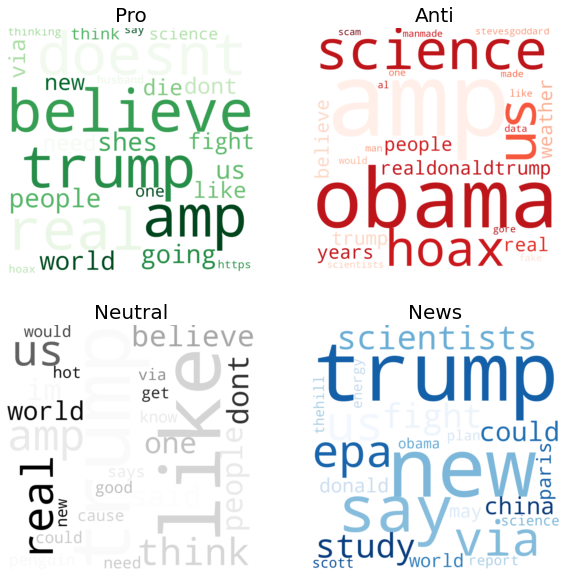

In [38]:
# Create figure
plt.figure(figsize=(10,10))

# Plot Pro
plt.subplot(2, 2, 1)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greens",stopwords=["rt", "climate", "change", "global", "warming"], margin=0).generate(" ".join(pro_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Pro', fontsize=20)

# Plot Anti
plt.subplot(2, 2, 2)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Reds",stopwords=["rt", "climate", "change", "global", "warming"], margin=0).generate(" ".join(anti_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Anti', fontsize=20)

# Plot Neutral
plt.subplot(2, 2, 3)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greys",stopwords=["rt", "climate", "change", "global", "warming"], margin=0).generate(" ".join(neutral_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Neutral', fontsize=20)

# Plot News
plt.subplot(2, 2, 4)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Blues",stopwords=["rt", "climate", "change", "global", "warming"], margin=0).generate(" ".join(news_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('News', fontsize=20)

plt.show()

Extract Retweets

In [39]:
# Create dataframe that only contains retweets
retweets = pd.DataFrame(copy_train_df[copy_train_df["RT"]=="True"])

Proportion of tweets that are retweets

Proportion of tweets that are retweets show how many tweets are there to retweets. We expect the number of retweets to be higher to tweets as there can be one tweet yet multipal retweets.

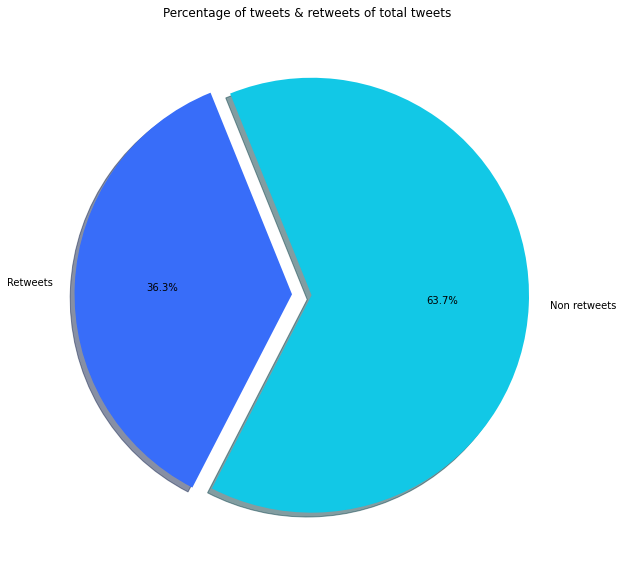

In [40]:
plt.figure(figsize=(10,10))
rt_length = np.array([len(retweets), len(train_df)]) #unique URLs divided by total
url_t = ["Retweets", "Non retweets"]
rt_colour = sns.color_palette('rainbow')
url_explode = [0.07, 0.02]
plt.pie(rt_length, labels=url_t, startangle=112, explode = url_explode,colors=rt_colour, shadow=True, autopct='%1.1f%%')
plt.title('Percentage of tweets & retweets of total tweets')
plt.show() 

Tweet Mentions Extraction

In [41]:
# Extract mentions from messages in to new column
copy_train_df["mention"] = ''
copy_train_df["mention"] = train_df["message"].str.findall(r'(?<![@\w])@(\w{1,25})').apply(', '.join)

# Create new data frame only showing messages that contain mentions
has_mention = pd.DataFrame(copy_train_df[copy_train_df["mention"] != ""])

# Create dataframes showing the frequency of mentioned users tweeted per sentiment
mention_all = pd.DataFrame(has_mention["mention"].str.extractall(r'(\w+)')[0].value_counts().head(10))
mention_n1 = pd.DataFrame(has_mention["mention"][has_mention["sentiment"]==-1].str.extractall(r'(\w+)')[0].value_counts().head(10))
mention_0 = pd.DataFrame(has_mention["mention"][has_mention["sentiment"]==0].str.extractall(r'(\w+)')[0].value_counts().head(10))
mention_1 = pd.DataFrame(has_mention["mention"][has_mention["sentiment"]==1].str.extractall(r'(\w+)')[0].value_counts().head(10))
mention_2 = pd.DataFrame(has_mention["mention"][has_mention["sentiment"]==2].str.extractall(r'(\w+)')[0].value_counts().head(10))

# Style created dataframes so they can be displayed side by side
mention_all_style = mention_all.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("All")
mention_n1_style = mention_n1.style.set_table_attributes("style='display:inline'").set_caption("Anti")
mention_0_style = mention_0.style.set_table_attributes("style='display:inline'").set_caption("Neutral")
mention_1_style = mention_1.style.set_table_attributes("style='display:inline'").set_caption("Pro")
mention_2_style = mention_2.style.set_table_attributes("style='display:inline'").set_caption("News")

# Display top 10 most mentioned users per sentiment
display_html(mention_all_style._repr_html_() + mention_n1_style._repr_html_() + mention_0_style._repr_html_() + mention_1_style._repr_html_() + mention_2_style._repr_html_(), raw=True)

,0
realDonaldTrump,432
StephenSchlegel,362
SenSanders,342
LeoDiCaprio,201
CNN,182
BernieSanders,180
nytimes,175
thehill,170
NatGeoChannel,159
washingtonpost,123


In [42]:
# Display amount of unique mentions
unique_mentions = has_mention["mention"].str.extractall(r'(\w+)')[0].value_counts()
print(len(unique_mentions))

14057


In [43]:
# Create list of most frequently mentioned Twitter handles by sentiment
anti_mentions = pd.DataFrame(has_mention["mention"][has_mention["sentiment"]==-1].str.extractall(r'(\w+)')[0].value_counts().head(30)).index.values.tolist()
neutral_mentions = pd.DataFrame(has_mention["mention"][has_mention["sentiment"]==0].str.extractall(r'(\w+)')[0].value_counts().head(30)).index.values.tolist()
pro_mentions = pd.DataFrame(has_mention["mention"][has_mention["sentiment"]==1].str.extractall(r'(\w+)')[0].value_counts().head(30)).index.values.tolist()
news_mentions = pd.DataFrame(has_mention["mention"][has_mention["sentiment"]==2].str.extractall(r'(\w+)')[0].value_counts().head(30)).index.values.tolist()

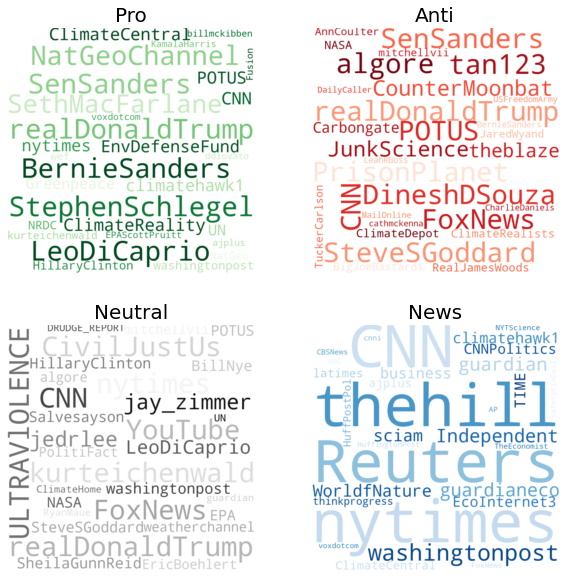

In [44]:
# Create figure
plt.figure(figsize=(10,10))
# Plot Pro
plt.subplot(2, 2, 1)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greens", margin=0).generate(" ".join(pro_mentions))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Pro', fontsize=20)

# Plot Anti
plt.subplot(2, 2, 2)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Reds", margin=0).generate(" ".join(anti_mentions))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Anti', fontsize=20)

# Plot Neutral
plt.subplot(2, 2, 3)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greys", margin=0).generate(" ".join(neutral_mentions))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Neutral', fontsize=20)

# Plot News
plt.subplot(2, 2, 4)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Blues", margin=0).generate(" ".join(news_mentions))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('News', fontsize=20)

plt.show()

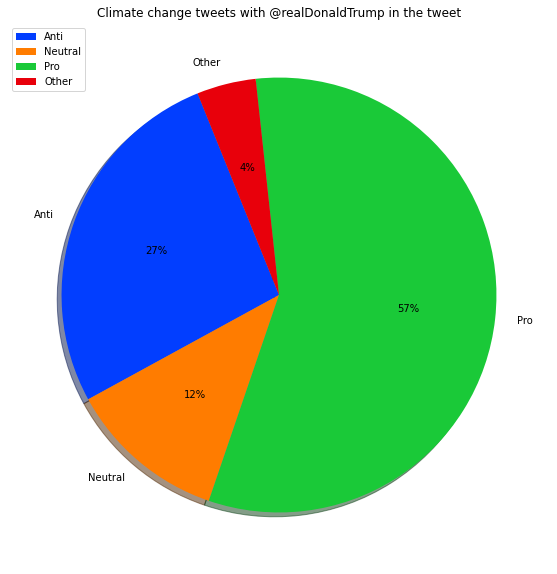

In [45]:
DT_all =	432 # All tweets with Donal Trump handle
DT_anti = 116 #Anti-climate chaneg tweets with Donal Trump handle
DT_n = 51 #Neutral climate change tweets with Donal Trump handle
DT_pro = 246 #Pro-climate change tweets with Donal Trump handle
DT_other = DT_all - (DT_anti + DT_n + DT_pro) #News and other tweets with Donal Trump handle

pie_dt = np.array([DT_anti, DT_n, DT_pro, DT_other])
dt_labels = ["Anti", "Neutral", "Pro", "Other"]
dt_colour = sns.color_palette('bright')
dt_explode = 0.5
plt.figure(figsize=(10,10))
plt.pie(pie_dt, labels=dt_labels, startangle=112,colors=dt_colour, shadow=True, autopct='%1.0f%%')
plt.title('Climate change tweets with @realDonaldTrump in the tweet')
plt.legend()
plt.show() 

Based on the Top 10 Twitter handles mentioned in each sort of sentiment type, the chart below shows the influence of two of the biggest news networks in America.

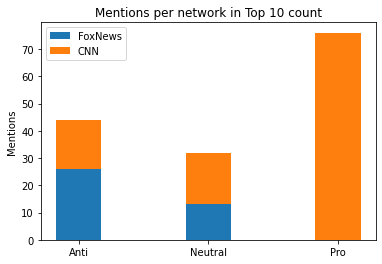

In [46]:
labels = ['Anti', 'Neutral', 'Pro']
Fox_c = [26, 13, 0]
CNN_c = [18, 19, 76]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, Fox_c, width,  label='FoxNews')
ax.bar(labels, CNN_c, width, bottom=Fox_c, label='CNN')

ax.set_ylabel('Mentions')
ax.set_title('Mentions per network in Top 10 count')
ax.legend()

plt.show()

In [47]:
# Extract mentions from retweets
rt_mention = has_mention[has_mention["RT"] == "True"]

# Create dataframes showing the frequency of mentions retweeted per sentiment
mention_all_rt = pd.DataFrame(rt_mention["mention"].str.extractall(r'(\w+)')[0].value_counts().head(10))
mention_n1_rt = pd.DataFrame(rt_mention["mention"][rt_mention["sentiment"]==-1].str.extractall(r'(\w+)')[0].value_counts().head(10))
mention_0_rt = pd.DataFrame(rt_mention["mention"][rt_mention["sentiment"]==0].str.extractall(r'(\w+)')[0].value_counts().head(10))
mention_1_rt = pd.DataFrame(rt_mention["mention"][rt_mention["sentiment"]==1].str.extractall(r'(\w+)')[0].value_counts().head(10))
mention_2_rt = pd.DataFrame(rt_mention["mention"][rt_mention["sentiment"]==2].str.extractall(r'(\w+)')[0].value_counts().head(10))

# Style created dataframes so they can be displayed side by side
mention_all_rt_style = mention_all_rt.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("All")
mention_n1_rt_style = mention_n1_rt.style.set_table_attributes("style='display:inline'").set_caption("Anti")
mention_0_rt_style = mention_0_rt.style.set_table_attributes("style='display:inline'").set_caption("Neutral")
mention_1_rt_style = mention_1_rt.style.set_table_attributes("style='display:inline'").set_caption("Pro")
mention_2_rt_style = mention_2_rt.style.set_table_attributes("style='display:inline'").set_caption("News")

# Display top 10 most retweeted mentions per sentiment
display_html(mention_all_rt_style._repr_html_() + 
                mention_n1_rt_style._repr_html_() + 
                mention_0_rt_style._repr_html_() + 
                mention_1_rt_style._repr_html_() + 
                mention_2_rt_style._repr_html_(), 
                raw=True)

,0
StephenSchlegel,362
SenSanders,311
realDonaldTrump,202
LeoDiCaprio,170
BernieSanders,169
thehill,150
nytimes,144
NatGeoChannel,134
CNN,125
ClimateCentral,101


In [48]:
# Display amount of unique mentions in retweeted messages
unique_mentions_rt = rt_mention["mention"].str.extractall(r'(\w+)')[0].value_counts()
print(len(unique_mentions_rt))

10801


In [49]:
# Create list of most frequently mentioned Twitter handles by sentiment
anti_mentions_rt = pd.DataFrame(rt_mention["mention"][rt_mention["sentiment"]==-1].str.extractall(r'(\w+)')[0].value_counts().head(30)).index.values.tolist()
neutral_mentions_rt = pd.DataFrame(rt_mention["mention"][rt_mention["sentiment"]==0].str.extractall(r'(\w+)')[0].value_counts().head(30)).index.values.tolist()
pro_mentions_rt = pd.DataFrame(rt_mention["mention"][rt_mention["sentiment"]==1].str.extractall(r'(\w+)')[0].value_counts().head(30)).index.values.tolist()
news_mentions_rt = pd.DataFrame(rt_mention["mention"][rt_mention["sentiment"]==2].str.extractall(r'(\w+)')[0].value_counts().head(30)).index.values.tolist()

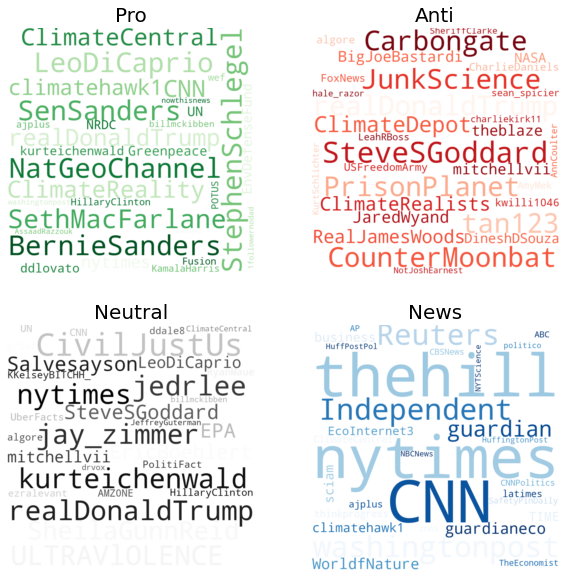

In [50]:
# Create figure
plt.figure(figsize=(10,10))
# Plot Pro
plt.subplot(2, 2, 1)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greens", margin=0).generate(" ".join(pro_mentions_rt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Pro', fontsize=20)

# Plot Anti
plt.subplot(2, 2, 2)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Reds", margin=0).generate(" ".join(anti_mentions_rt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Anti', fontsize=20)

# Plot Neutral
plt.subplot(2, 2, 3)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greys", margin=0).generate(" ".join(neutral_mentions_rt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Neutral', fontsize=20)

# Plot News
plt.subplot(2, 2, 4)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Blues", margin=0).generate(" ".join(news_mentions_rt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('News', fontsize=20)

plt.show()

In [51]:
# Extract mentions from tweets excluding retweets
has_mention_nrt = has_mention[has_mention["RT"] == "False"]

# Create dataframes showing the frequency of mentions tweeted per sentiment excluding retweets
mention_all_nrt = pd.DataFrame(has_mention_nrt["mention"].str.extractall(r'(\w+)')[0].value_counts().head(10))
mention_n1_nrt = pd.DataFrame(has_mention_nrt["mention"][has_mention_nrt["sentiment"]==-1].str.extractall(r'(\w+)')[0].value_counts().head(10))
mention_0_nrt = pd.DataFrame(has_mention_nrt["mention"][has_mention_nrt["sentiment"]==0].str.extractall(r'(\w+)')[0].value_counts().head(10))
mention_1_nrt = pd.DataFrame(has_mention_nrt["mention"][has_mention_nrt["sentiment"]==1].str.extractall(r'(\w+)')[0].value_counts().head(10))
mention_2_nrt = pd.DataFrame(has_mention_nrt["mention"][has_mention_nrt["sentiment"]==2].str.extractall(r'(\w+)')[0].value_counts().head(10))

# Style created dataframes so they can be displayed side by side
mention_all_nrt_style = mention_all_nrt.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("All")
mention_n1_nrt_style = mention_n1_nrt.style.set_table_attributes("style='display:inline'").set_caption("Anti")
mention_0_nrt_style = mention_0_nrt.style.set_table_attributes("style='display:inline'").set_caption("Neutral")
mention_1_nrt_style = mention_1_nrt.style.set_table_attributes("style='display:inline'").set_caption("Pro")
mention_2_nrt_style = mention_2_nrt.style.set_table_attributes("style='display:inline'").set_caption("News")

# Display top 10 most tweeted mentions per sentiment excluding retweets
display_html(mention_all_nrt_style._repr_html_() + mention_n1_nrt_style._repr_html_() + mention_0_nrt_style._repr_html_() + mention_1_nrt_style._repr_html_() + mention_2_nrt_style._repr_html_(), raw=True)

,0
realDonaldTrump,230
CNN,57
YouTube,44
FoxNews,38
POTUS,38
c0nvey,32
LeoDiCaprio,31
nytimes,31
SenSanders,31
Reuters,30


In [52]:
# Display amount of unique mentions excluding retweets
unique_mentions_nrt = has_mention_nrt["mention"].str.extractall(r'(\w+)')[0].value_counts()
print(len(unique_mentions_nrt))

4270


In [53]:
# Create list of most frequently mentioned Twitter handles by sentiment
anti_mentions_nrt = pd.DataFrame(has_mention_nrt["mention"][has_mention_nrt["sentiment"]==-1].str.extractall(r'(\w+)')[0].value_counts().head(30)).index.values.tolist()
neutral_mentions_nrt = pd.DataFrame(has_mention_nrt["mention"][has_mention_nrt["sentiment"]==0].str.extractall(r'(\w+)')[0].value_counts().head(30)).index.values.tolist()
pro_mentions_nrt = pd.DataFrame(has_mention_nrt["mention"][has_mention_nrt["sentiment"]==1].str.extractall(r'(\w+)')[0].value_counts().head(30)).index.values.tolist()
news_mentions_nrt = pd.DataFrame(has_mention_nrt["mention"][has_mention_nrt["sentiment"]==2].str.extractall(r'(\w+)')[0].value_counts().head(30)).index.values.tolist()

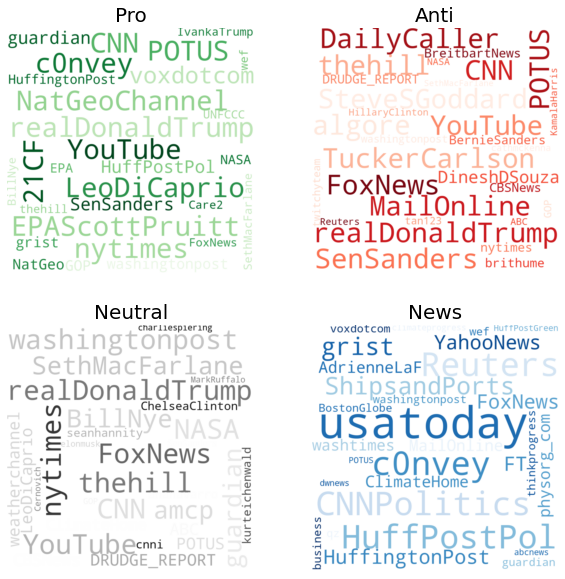

In [54]:
# Create figure
plt.figure(figsize=(10,10))
# Plot Pro
plt.subplot(2, 2, 1)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greens", margin=0).generate(" ".join(pro_mentions_nrt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Pro', fontsize=20)

# Plot Anti
plt.subplot(2, 2, 2)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Reds", margin=0).generate(" ".join(anti_mentions_nrt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Anti', fontsize=20)

# Plot Neutral
plt.subplot(2, 2, 3)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greys", margin=0).generate(" ".join(neutral_mentions_nrt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Neutral', fontsize=20)

# Plot News
plt.subplot(2, 2, 4)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Blues", margin=0).generate(" ".join(news_mentions_nrt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('News', fontsize=20)

plt.show()

Hashtag Extraction

In [55]:
# Extract hashtags from messages in to new column
copy_train_df["hashtag"] = ''
copy_train_df["hashtag"] = train_df["message"].str.findall(r'#.*?(?=\s|$)').apply(','.join)

# Create new data frame only showing messages that contain hashtags
has_hashtag = pd.DataFrame(copy_train_df[copy_train_df["hashtag"] != ""])

# Create dataframes showing the frequency of hashtags tweeted per sentiment
hashtag_all = pd.DataFrame(has_hashtag["hashtag"].str.extractall(r'(\#\w+)')[0].value_counts().head(10))
hashtag_n1 = pd.DataFrame(has_hashtag["hashtag"][has_hashtag["sentiment"]==-1].str.extractall(r'(\#\w+)')[0].value_counts().head(10))
hashtag_0 = pd.DataFrame(has_hashtag["hashtag"][has_hashtag["sentiment"]==0].str.extractall(r'(\#\w+)')[0].value_counts().head(10))
hashtag_1 = pd.DataFrame(has_hashtag["hashtag"][has_hashtag["sentiment"]==1].str.extractall(r'(\#\w+)')[0].value_counts().head(10))
hashtag_2 = pd.DataFrame(has_hashtag["hashtag"][has_hashtag["sentiment"]==2].str.extractall(r'(\#\w+)')[0].value_counts().head(10))

# Style created dataframes so they can be displayed side by side
hashtag_all_style = hashtag_all.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("All")
hashtag_n1_style = hashtag_n1.style.set_table_attributes("style='display:inline'").set_caption("Anti")
hashtag_0_style = hashtag_0.style.set_table_attributes("style='display:inline'").set_caption("Neutral")
hashtag_1_style = hashtag_1.style.set_table_attributes("style='display:inline'").set_caption("Pro")
hashtag_2_style = hashtag_2.style.set_table_attributes("style='display:inline'").set_caption("News")

# Display top 10 most tweeted hashtags per sentiment
display_html(hashtag_all_style._repr_html_() + hashtag_n1_style._repr_html_() + hashtag_0_style._repr_html_() + hashtag_1_style._repr_html_() + hashtag_2_style._repr_html_(), raw=True)

,0
#climate,598
#climatechange,297
#BeforeTheFlood,180
#ClimateChange,106
#Trump,100
#ActOnClimate,98
#ParisAgreement,90
#COP22,86
#environment,78
#auspol,67


In [56]:
# Display amount of unique hashtags
unique_hashtags = has_hashtag["hashtag"].str.extractall(r'(\#\w+)')[0].value_counts()
print(len(unique_hashtags))

3967


In [57]:
# Create list of most frequently mentioned Twitter handles by sentiment
anti_hashtag = pd.DataFrame(has_hashtag["hashtag"][has_hashtag["sentiment"]==-1].str.extractall(r'(\#\w+)')[0].value_counts().head(30)).index.values.tolist()
neutral_hashtag = pd.DataFrame(has_hashtag["hashtag"][has_hashtag["sentiment"]==0].str.extractall(r'(\#\w+)')[0].value_counts().head(30)).index.values.tolist()
pro_hashtag = pd.DataFrame(has_hashtag["hashtag"][has_hashtag["sentiment"]==1].str.extractall(r'(\#\w+)')[0].value_counts().head(30)).index.values.tolist()
news_hashtag = pd.DataFrame(has_hashtag["hashtag"][has_hashtag["sentiment"]==2].str.extractall(r'(\#\w+)')[0].value_counts().head(30)).index.values.tolist()

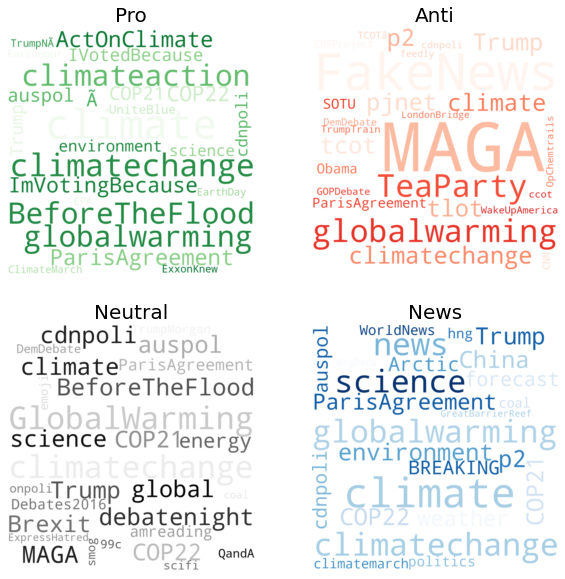

In [58]:
# Create figure
plt.figure(figsize=(10,10))
# Plot Pro
plt.subplot(2, 2, 1)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greens", margin=0).generate(" ".join(pro_hashtag))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Pro', fontsize=20)

# Plot Anti
plt.subplot(2, 2, 2)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Reds", margin=0).generate(" ".join(anti_hashtag))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Anti', fontsize=20)

# Plot Neutral
plt.subplot(2, 2, 3)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greys", margin=0).generate(" ".join(neutral_hashtag))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Neutral', fontsize=20)

# Plot News
plt.subplot(2, 2, 4)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Blues", margin=0).generate(" ".join(news_hashtag))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('News', fontsize=20)

plt.show()

In [59]:
# Extract hashtags from retweets
rt_hashtag = has_hashtag[has_hashtag["RT"] == "True"]

# Create dataframes showing the frequency of hashtags retweeted per sentiment
hashtag_all_rt = pd.DataFrame(rt_hashtag["hashtag"].str.extractall(r'(\#\w+)')[0].value_counts().head(10))
hashtag_n1_rt = pd.DataFrame(rt_hashtag["hashtag"][rt_hashtag["sentiment"]==-1].str.extractall(r'(\#\w+)')[0].value_counts().head(10))
hashtag_0_rt = pd.DataFrame(rt_hashtag["hashtag"][rt_hashtag["sentiment"]==0].str.extractall(r'(\#\w+)')[0].value_counts().head(10))
hashtag_1_rt = pd.DataFrame(rt_hashtag["hashtag"][rt_hashtag["sentiment"]==1].str.extractall(r'(\#\w+)')[0].value_counts().head(10))
hashtag_2_rt = pd.DataFrame(rt_hashtag["hashtag"][rt_hashtag["sentiment"]==2].str.extractall(r'(\#\w+)')[0].value_counts().head(10))

# Style created dataframes so they can be displayed side by side
hashtag_all_rt_style = hashtag_all_rt.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("All")
hashtag_n1_rt_style = hashtag_n1_rt.style.set_table_attributes("style='display:inline'").set_caption("Anti")
hashtag_0_rt_style = hashtag_0_rt.style.set_table_attributes("style='display:inline'").set_caption("Neutral")
hashtag_1_rt_style = hashtag_1_rt.style.set_table_attributes("style='display:inline'").set_caption("Pro")
hashtag_2_rt_style = hashtag_2_rt.style.set_table_attributes("style='display:inline'").set_caption("News")

# Display top 10 most retweeted hashtags per sentiment
display_html(hashtag_all_rt_style._repr_html_() + 
                hashtag_n1_rt_style._repr_html_() + 
                hashtag_0_rt_style._repr_html_() + 
                hashtag_1_rt_style._repr_html_() + 
                hashtag_2_rt_style._repr_html_(), 
                raw=True)

,0
#climate,416
#BeforeTheFlood,147
#climatechange,141
#ActOnClimate,74
#COP22,63
#ParisAgreement,62
#ImVotingBecause,59
#ClimateChange,55
#Ã,50
#Trump,49


In [60]:
# Display amount of unique hashtags retweeted
unique_hashtags_rt = rt_hashtag["hashtag"].str.extractall(r'(\#\w+)')[0].value_counts()
print(len(unique_hashtags_rt))

2328


In [61]:
# Create list of most frequently mentioned Twitter handles by sentiment
anti_hashtag_rt = pd.DataFrame(rt_hashtag["hashtag"][rt_hashtag["sentiment"]==-1].str.extractall(r'(\#\w+)')[0].value_counts().head(30)).index.values.tolist()
neutral_hashtag_rt = pd.DataFrame(rt_hashtag["hashtag"][rt_hashtag["sentiment"]==0].str.extractall(r'(\#\w+)')[0].value_counts().head(30)).index.values.tolist()
pro_hashtag_rt = pd.DataFrame(rt_hashtag["hashtag"][rt_hashtag["sentiment"]==1].str.extractall(r'(\#\w+)')[0].value_counts().head(30)).index.values.tolist()
news_hashtag_rt = pd.DataFrame(rt_hashtag["hashtag"][rt_hashtag["sentiment"]==2].str.extractall(r'(\#\w+)')[0].value_counts().head(30)).index.values.tolist()

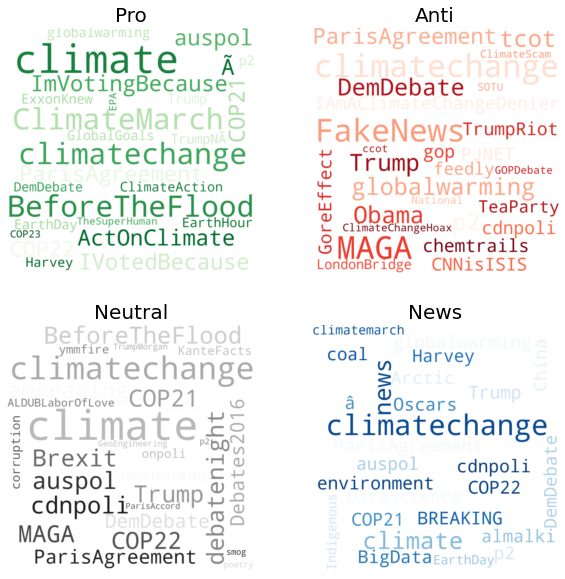

In [62]:
# Create figure
plt.figure(figsize=(10,10))
# Plot Pro
plt.subplot(2, 2, 1)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greens", margin=0).generate(" ".join(pro_hashtag_rt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Pro', fontsize=20)

# Plot Anti
plt.subplot(2, 2, 2)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Reds", margin=0).generate(" ".join(anti_hashtag_rt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Anti', fontsize=20)

# Plot Neutral
plt.subplot(2, 2, 3)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greys", margin=0).generate(" ".join(neutral_hashtag_rt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Neutral', fontsize=20)

# Plot News
plt.subplot(2, 2, 4)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Blues", margin=0).generate(" ".join(news_hashtag_rt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('News', fontsize=20)

plt.show()

In [63]:
# Extract hashtags from tweets excluding retweets
nrt_hashtag = has_hashtag[has_hashtag["RT"] == "False"]

# Create dataframes showing the frequency of hashtags users tweeted per sentiment excluding retweets
hashtag_all_nrt = pd.DataFrame(nrt_hashtag["hashtag"].str.extractall(r'(\#\w+)')[0].value_counts().head(10))
hashtag_n1_nrt = pd.DataFrame(nrt_hashtag["hashtag"][nrt_hashtag["sentiment"]==-1].str.extractall(r'(\#\w+)')[0].value_counts().head(10))
hashtag_0_nrt = pd.DataFrame(nrt_hashtag["hashtag"][nrt_hashtag["sentiment"]==0].str.extractall(r'(\#\w+)')[0].value_counts().head(10))
hashtag_1_nrt = pd.DataFrame(nrt_hashtag["hashtag"][nrt_hashtag["sentiment"]==1].str.extractall(r'(\#\w+)')[0].value_counts().head(10))
hashtag_2_nrt = pd.DataFrame(nrt_hashtag["hashtag"][nrt_hashtag["sentiment"]==2].str.extractall(r'(\#\w+)')[0].value_counts().head(10))

# Style created dataframes so they can be displayed side by side
hashtag_all_nrt_style = hashtag_all_nrt.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("All")
hashtag_n1_nrt_style = hashtag_n1_nrt.style.set_table_attributes("style='display:inline'").set_caption("Anti")
hashtag_0_nrt_style = hashtag_0_nrt.style.set_table_attributes("style='display:inline'").set_caption("Neutral")
hashtag_1_nrt_style = hashtag_1_nrt.style.set_table_attributes("style='display:inline'").set_caption("Pro")
hashtag_2_nrt_style = hashtag_2_nrt.style.set_table_attributes("style='display:inline'").set_caption("News")

# Display top 10 most tweeted hashtags per sentiment excluding retweets
display_html(hashtag_all_nrt_style._repr_html_() + 
                hashtag_n1_nrt_style._repr_html_() + 
                hashtag_0_nrt_style._repr_html_() + 
                hashtag_1_nrt_style._repr_html_() + 
                hashtag_2_nrt_style._repr_html_(), 
                raw=True)

,0
#climate,182
#climatechange,156
#ClimateChange,51
#Trump,51
#environment,50
#news,37
#science,34
#BeforeTheFlood,33
#ParisAgreement,28
#ActOnClimate,24


In [64]:
# Display amount of unique hashtags tweeted excluding retweets
unique_hashtags_nrt = nrt_hashtag["hashtag"].str.extractall(r'(\#\w+)')[0].value_counts()
print(len(unique_hashtags_nrt))

2075


In [65]:
# Create list of most frequently mentioned Twitter handles by sentiment
anti_hashtag_nrt = pd.DataFrame(nrt_hashtag["hashtag"][nrt_hashtag["sentiment"]==-1].str.extractall(r'(\#\w+)')[0].value_counts().head(30)).index.values.tolist()
neutral_hashtag_nrt = pd.DataFrame(nrt_hashtag["hashtag"][nrt_hashtag["sentiment"]==0].str.extractall(r'(\#\w+)')[0].value_counts().head(30)).index.values.tolist()
pro_hashtag_nrt = pd.DataFrame(nrt_hashtag["hashtag"][nrt_hashtag["sentiment"]==1].str.extractall(r'(\#\w+)')[0].value_counts().head(30)).index.values.tolist()
news_hashtag_nrt = pd.DataFrame(nrt_hashtag["hashtag"][nrt_hashtag["sentiment"]==2].str.extractall(r'(\#\w+)')[0].value_counts().head(30)).index.values.tolist()

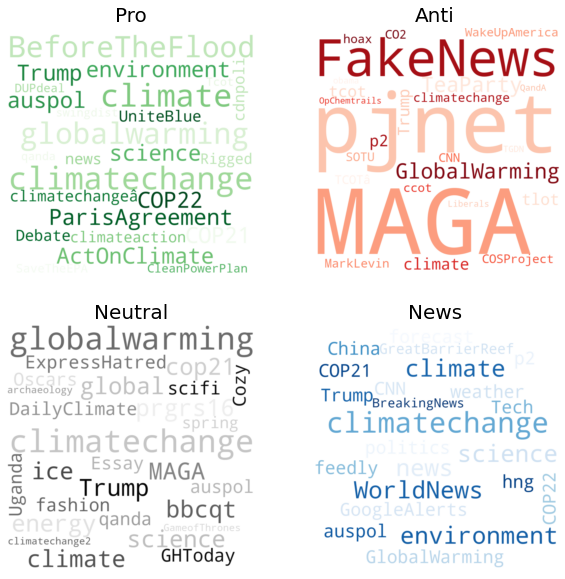

In [66]:
# Create figure
plt.figure(figsize=(10,10))
# Plot Pro
plt.subplot(2, 2, 1)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greens", margin=0).generate(" ".join(pro_hashtag_nrt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Pro', fontsize=20)

# Plot Anti
plt.subplot(2, 2, 2)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Reds", margin=0).generate(" ".join(anti_hashtag_nrt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Anti', fontsize=20)

# Plot Neutral
plt.subplot(2, 2, 3)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Greys", margin=0).generate(" ".join(neutral_hashtag_nrt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Neutral', fontsize=20)

# Plot News
plt.subplot(2, 2, 4)
wordcloud = WordCloud(width=1000, height=1000, background_color="white", colormap="Blues", margin=0).generate(" ".join(news_hashtag_nrt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('News', fontsize=20)

plt.show()

**Politics of the times**

An analysis of the twitter data also reveals that Donal Trump was key figure in Twitter whether tweets were in support of, against or neutral... Even news media could not keep his name away with regards to matter of public interest. 

However, it appears that those who appear to be belivers in climate change, dedicate hashtags to other key climate-related words such as #ClimateChange, #ParisAgreement and #ActOnClimate.

The presence of President Donal Trump on the fingertips of users reflects the time period from which the data was collected.

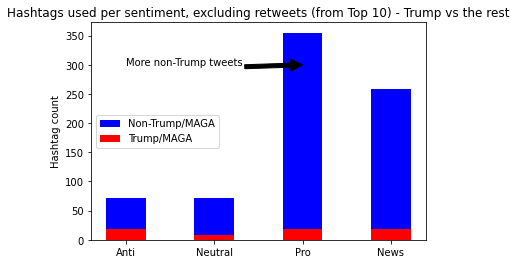

In [67]:
# hashtags used per sentiment excluding retweets (from Top 10)

labels = ['Anti', 'Neutral', 'Pro', "News"]
dt_ht = [18, 9, 19, 19] #total trump/MAGA hashtags used per sentiment excluding retweets
other_ht = [53, 62, 336, 240] #total of non-trump hashtags used per sentiment excluding retweets

width = 0.45       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, other_ht, width, bottom=dt_ht, color='b', label='Non-Trump/MAGA')
ax.bar(labels, dt_ht, width,  color='r',label='Trump/MAGA')

ax.set_ylabel('Hashtag count')
ax.set_title('Hashtags used per sentiment, excluding retweets (from Top 10) - Trump vs the rest')

ax.legend(loc='center left')
plt.annotate('More non-Trump tweets', xy=('Pro', 300), xytext=('Anti', 300),
           arrowprops=dict(facecolor='black'))
plt.show()

URL Extraction

In [68]:
# Extract URLs from messages in to new column
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)'
copy_train_df['URL'] = ''
copy_train_df['URL'] = train_df['message'].str.findall(pattern).apply(', '.join)

# Create data frame showing messages that contain URLs
has_url = pd.DataFrame(copy_train_df[copy_train_df["URL"].notnull()])

# Create dataframes showing the frequency of the same URLs tweeted per sentiment
url_all = pd.DataFrame(has_url["URL"].str.extractall(pattern)[0].value_counts().head(10))
url_n1 = pd.DataFrame(has_url["URL"][has_url["sentiment"]==-1].str.extractall(pattern)[0].value_counts().head(10))
url_0 = pd.DataFrame(has_url["URL"][has_url["sentiment"]==0].str.extractall(pattern)[0].value_counts().head(10))
url_1 = pd.DataFrame(has_url["URL"][has_url["sentiment"]==1].str.extractall(pattern)[0].value_counts().head(10))
url_2 = pd.DataFrame(has_url["URL"][has_url["sentiment"]==2].str.extractall(pattern)[0].value_counts().head(10))

# Style created dataframes so they can be displayed side by side
url_all_style = url_all.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("All")
url_n1_style = url_n1.style.set_table_attributes("style='display:inline'").set_caption("Anti")
url_0_style = url_0.style.set_table_attributes("style='display:inline'").set_caption("Neutral")
url_1_style = url_1.style.set_table_attributes("style='display:inline'").set_caption("Pro")
url_2_style = url_2.style.set_table_attributes("style='display:inline'").set_caption("News")

# Display top 10 most tweeted URLs per sentiment
display_html(url_all_style._repr_html_() + url_n1_style._repr_html_() + url_0_style._repr_html_() + url_1_style._repr_html_() + url_2_style._repr_html_(), raw=True)

,0
https://t.co/SjoFoN,362
https://t.c,184
https://t.co/,164
https://t.co,161
https://t.co/LkDehj3tNn,104
https://t.co/HypysWHvVV,24
https://t.co/u1UbQXLmrF,16
https://t.co/eWVQtI28t3,14
https://t.co/7qV3RfzTTE,14
https://t.co/8ZYOZK4KfR,13


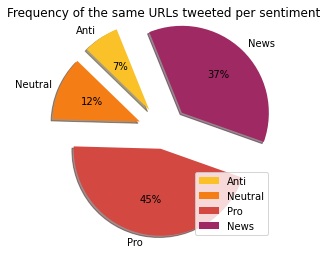

In [69]:
sentiment_url_anti = len(pd.DataFrame(has_url["URL"][has_url["sentiment"]==-1].str.extractall(pattern)[0]))
sentiment_url_n = len(pd.DataFrame(has_url["URL"][has_url["sentiment"]==0].str.extractall(pattern)[0]))
sentiment_url_pro = len(pd.DataFrame(has_url["URL"][has_url["sentiment"]==1].str.extractall(pattern)[0]))
sentiment_url_news = len(pd.DataFrame(has_url["URL"][has_url["sentiment"]==2].str.extractall(pattern)[0]))

pie_sen = np.array([sentiment_url_anti, sentiment_url_n, sentiment_url_pro, sentiment_url_news])
sen_labels = ["Anti", "Neutral", "Pro", "News"]
sen_colour = sns.color_palette("inferno_r")
sen_explode = [0.3, 0.3, 0.2, 0.3]
plt.pie(pie_sen, labels=sen_labels, startangle=112,colors=sen_colour, shadow=True, explode=sen_explode, autopct='%1.0f%%')
plt.title('Frequency of the same URLs tweeted per sentiment')
plt.legend(loc="lower right")
plt.show() 

In [70]:
# Display count of unique URLs in dataframe
unique_url = has_url['URL'].value_counts()
print(len(unique_url))

15695


15695


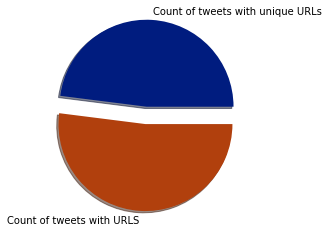

In [71]:
# Display count of unique URLs in dataframe
unique_url = has_url['URL'].value_counts()
print(len(unique_url))

u = np.array([len(unique_url), 17003]) #unique URLs divided by total
url_t = ["Count of tweets with unique URLs", "Count of tweets with URLS"]
# sns colour palette to use
palette_colour = sns.color_palette('dark')
url_explode = [0.2, 0]

plt.pie(u, labels=url_t, explode = url_explode, shadow = True,colors=palette_colour)
plt.show() 

In [72]:
# Extract URLs from retweets
rt_url = has_url[has_url["RT"] == "True"]

# Create dataframes showing the frequency of the same URLs retweeted per sentiment
url_all_rt = pd.DataFrame(rt_url['URL'].str.extractall(pattern)[0].value_counts().head(10))
url_n1_rt = pd.DataFrame(rt_url["URL"][rt_url["sentiment"]==-1].str.extractall(pattern)[0].value_counts().head(10))
url_0_rt = pd.DataFrame(rt_url["URL"][rt_url["sentiment"]==0].str.extractall(pattern)[0].value_counts().head(10))
url_1_rt = pd.DataFrame(rt_url["URL"][rt_url["sentiment"]==1].str.extractall(pattern)[0].value_counts().head(10))
url_2_rt = pd.DataFrame(rt_url["URL"][rt_url["sentiment"]==2].str.extractall(pattern)[0].value_counts().head(10))

# Style created dataframes so they can be displayed side by side
url_all_rt_style = url_all_rt.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("All")
url_n1_rt_style = url_n1_rt.style.set_table_attributes("style='display:inline'").set_caption("Anti")
url_0_rt_style = url_0_rt.style.set_table_attributes("style='display:inline'").set_caption("Neutral")
url_1_rt_style = url_1_rt.style.set_table_attributes("style='display:inline'").set_caption("Pro")
url_2_rt_style = url_2_rt.style.set_table_attributes("style='display:inline'").set_caption("News")

# Display top 10 most retweeted URLs per sentiment
display_html(url_all_rt_style._repr_html_() + url_n1_rt_style._repr_html_() + url_0_rt_style._repr_html_() + url_1_rt_style._repr_html_() + url_2_rt_style._repr_html_(), raw=True)

,0
https://t.co/SjoFoN,362
https://t.c,184
https://t.co/,164
https://t.co,161
https://t.co/LkDehj3tNn,104
https://t.co/HypysWHvVV,24
https://t.co/eWVQtI28t3,14
https://t.co/7qV3RfzTTE,14
https://t.co/8ZYOZK4KfR,13
https://t.co/xP8Y6eSmyx,13


In [73]:
# Display count of unique URLs retweeted
unique_list_rt = rt_url['URL'].value_counts()
print(len(unique_list_rt))

7056


In [74]:
# Extract URLs from tweets excluding retweets
has_url_nrt = has_url[has_url["RT"] == "False"]

# Create dataframes showing the frequency of the same URLs tweeted per sentiment excluding retweets
url_all_nrt = pd.DataFrame(has_url_nrt['URL'].str.extractall(pattern)[0].value_counts().head(10))
url_n1_nrt = pd.DataFrame(has_url_nrt["URL"][has_url_nrt["sentiment"]==-1].str.extractall(pattern)[0].value_counts().head(10))
url_0_nrt = pd.DataFrame(has_url_nrt["URL"][has_url_nrt["sentiment"]==0].str.extractall(pattern)[0].value_counts().head(10))
url_1_nrt = pd.DataFrame(has_url_nrt["URL"][has_url_nrt["sentiment"]==1].str.extractall(pattern)[0].value_counts().head(10))
url_2_nrt = pd.DataFrame(has_url_nrt["URL"][has_url_nrt["sentiment"]==2].str.extractall(pattern)[0].value_counts().head(10))

# Style created dataframes so they can be displayed side by side
url_all_nrt_style = url_all_nrt.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("All")
url_n1_nrt_style = url_n1_nrt.style.set_table_attributes("style='display:inline'").set_caption("Anti")
url_0_nrt_style = url_0_nrt.style.set_table_attributes("style='display:inline'").set_caption("Neutral")
url_1_nrt_style = url_1_nrt.style.set_table_attributes("style='display:inline'").set_caption("Pro")
url_2_nrt_style = url_2_nrt.style.set_table_attributes("style='display:inline'").set_caption("News")

# Display top 10 most tweeted URLs per sentiment excluding retweets
display_html(url_all_nrt_style._repr_html_() + url_n1_nrt_style._repr_html_() + url_0_nrt_style._repr_html_() + url_1_nrt_style._repr_html_() + url_2_nrt_style._repr_html_(), raw=True)

,0
https://t.co/u1UbQXLmrF,16
https://t.co/6SoXS3kdim,7
https://t.co/IhVMx8RHLU,6
https://t.co/3nG3t7oJZI,6
https://t.co/fxuOSXH5qq,5
https://t.co/nb9jeqOkzU,5
https://t.co/LTVC09rfhf,5
https://t.co/nZCxr5XRhU,4
https://t.co/wwdORYyv3J,4
https://t.co/Z2xLWdaJA1,4


In [75]:
# Display count of unique URLs tweeted excluding retweets 
unique_list_nrt = has_url_nrt['URL'].value_counts()
print(len(unique_list_nrt))

8660


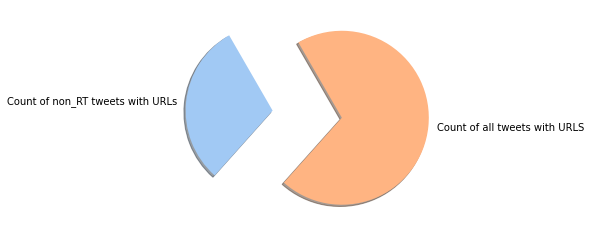

In [76]:
# Display count of unique URLs in dataframe
has_url_nrt = has_url[has_url["RT"] == "False"]

u = np.array([len(has_url_nrt), len(has_url)])
url_non_rt = ["Count of non_RT tweets with URLs", "Count of all tweets with URLS"]
# sns colour palette to use
palette_colour1 = sns.color_palette('pastel')
url_explode = [0.5, 0.3]

plt.pie(u, labels=url_non_rt, explode = url_explode, shadow = True,colors=palette_colour1, startangle = 120)
plt.show() 

# <h2 align="center">Model Building:</h2>

After the preprocessing and EDA has been completed it is now time to move on to the model building. To do this we will make use of 4 different classification models. 

The models which have been chosen are as follows:
- Naive Bayes (NB)
- Logistic Regression (LR)
- Support Vector Machines (SVM)
- Random Forests (RF)

To create the models, a pipeline has been used, which will vectorize and transform our data before fitting it to the respective models.

The first step is to set the dependent and independent variables, otherwise known as the target and feature variables. Once this has been completed, we can split our data in to a training and validation set. This allows us to train the model using the training data set and test the model performance using the validation set. 

This can be seen below:

Train Test Split

In [77]:
# Create target variable
y = train_df["sentiment"]

# Create features variable
X = train_df["message"]

# Train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Model Pipelines

Each of the pipelines below consist of three steps: 
- Vectorizing 
- Transforming 
- Model fitting

Natural language precessing models cannot understand textual data since they only accept numbers, therfore textual data needs to be vectorized to allow the model to read it. 

The CountVectorizer is a tool provided within scikit-learn in Python. It is used to transform a given text into a vector on the basis of the frequency of each word that appears in the text. 
It does this by creating a matrix in which each unique word is represented by a column of the matrix, and each text sample is a row. The value of each cell is nothing but the count of the word in that particular text, which allowing the model to understand the data.

The tf-idf transformer is then used to transform a count matrix to a normalized tf-idf representation. This is important since it allows the model to see the relevebce of each word in the text.

Naive Bayes (NB)

In [78]:
# Create NB pipeline and fit data
train_NB = Pipeline([('vect', CountVectorizer(lowercase=True, 
                                              stop_words='english',
                                              tokenizer=LemmaTokenizer(),
                                              max_features=100000,
                                              min_df=3,
                                              max_df=0.7,                                              
                                              analyzer='word', 
                                              ngram_range=(1, 2))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', ComplementNB()),])

train_NB = train_NB.fit(X_train, y_train)

Logistic Regression (LR)

In [79]:
# Create LR pipeline and fit data
train_LR = Pipeline([('vect', CountVectorizer(lowercase=True,
                                              stop_words='english',
                                              tokenizer=LemmaTokenizer(),
                                              analyzer='word',
                                              ngram_range=(1, 2),
                                              min_df=3,
                                              max_df=0.7,
                                              max_features=100000)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression(C=3,
                                                multi_class='ovr',
                                                max_iter=100000)),])

train_LR = train_LR.fit(X_train, y_train)

Linear Support Vector Machine (SVM)

In [80]:
# Create SVC pipeline and fit data
train_SVM_linear = Pipeline([('vect', CountVectorizer(lowercase=True,
                                              stop_words='english',
                                              tokenizer=LemmaTokenizer(),
                                              analyzer='word',
                                              ngram_range=(1, 2),
                                              min_df=3,
                                              max_df=0.7,
                                              max_features=100000)),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SVC(kernel='linear',
                                  C=2,
                                  gamma=1,
                                  random_state=42)),])

train_SVM_linear = train_SVM_linear.fit(X_train, y_train)

RBF Support Vector Machine (SVM)

In [81]:
# Create SVC pipeline and fit data
train_SVM_rbf = Pipeline([('vect', CountVectorizer(lowercase=True,
                                              stop_words='english',
                                              tokenizer=LemmaTokenizer(),
                                              analyzer='word',
                                              ngram_range=(1, 2),
                                              min_df=3,
                                              max_df=0.7,
                                              max_features=100000)),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SVC(kernel='rbf',
                                  C=2,
                                  gamma=1,
                                  random_state=42)),])

train_SVM_rbf = train_SVM_rbf.fit(X_train, y_train)

Random Forest (RF)

In [82]:
# Create RF pipeline and fit data
train_RF = Pipeline([('vect', CountVectorizer(lowercase=True,
                                              stop_words='english',
                                              tokenizer=LemmaTokenizer(),
                                              analyzer='word',
                                              ngram_range=(1, 2),
                                              min_df=3,
                                              max_df=0.7,
                                              max_features=100000)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=200, max_depth=10)),])

train_RF = train_RF.fit(X_train, y_train)

# <h2 align="center">Model Testing:</h2>

Each model will be evaluated based on their respective precision, accuracy and f1-scores when each model is used to predict the test set created above. The higher each score the better the model performed. Scores above 0.7 is our benchmark for a model to be considered good. 

A classification report was used to get and display the evaluation statistics of each model.

Naive Bayes (NB)

In [83]:
# Use the model to predict the test set
y_pred_NB = train_NB.predict(X_test)
# Generate and print a classification report for the model
print(metrics.classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

          -1       0.59      0.58      0.58       516
           0       0.57      0.45      0.51      1095
           1       0.79      0.77      0.78      3254
           2       0.65      0.81      0.72      1287

    accuracy                           0.71      6152
   macro avg       0.65      0.65      0.65      6152
weighted avg       0.71      0.71      0.70      6152



As can be seen above, the Naive Bayes model performed well overall. It had a f1-score accuracy of 0.71, which just meets our threshold to be considered a good model. However, the model did perform poorly when it came to predicting the anti and neutral sentiments with a f1-score of 0.58 and 0.51 respectively.

Logistic Regression (LR)

In [84]:
# Use the model to predict the test set
y_pred_LR = train_LR.predict(X_test)
# Generate and print a classification report for the model
print(metrics.classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

          -1       0.72      0.47      0.57       516
           0       0.63      0.40      0.49      1095
           1       0.74      0.89      0.81      3254
           2       0.76      0.73      0.75      1287

    accuracy                           0.73      6152
   macro avg       0.71      0.62      0.65      6152
weighted avg       0.72      0.73      0.72      6152



As can be seen above, the Logistic Regression model performed even better than the first model. It had a f1-score accuracy of 0.73, which acording to our threshold, is considered a good model. The model performed exceptionally well in predicting the pro sentiments, with a f1-score of 0.81. However, when it came to predicting the anti and neutral sentiments, it performed worse than the Naive Bayes model, with an f1-score of 0.57, a decrease of 0.01, and 0.49, a decrease of 0.01, respectively. 

When it came to using the Support Vector Machines, two models were trained. A linear model and a radial basis function (RBF) model. This is done since they have different mathematical approaches when it comes to making the hyperplane decision boundary between the classes.

Linear Support Vector Machine (SVM)

In [85]:
# Use the model to predict the test set
y_pred_SVM_linear = train_SVM_linear.predict(X_test)
# Generate and print a classification report for the model
print(metrics.classification_report(y_test, y_pred_SVM_linear))

              precision    recall  f1-score   support

          -1       0.65      0.56      0.60       516
           0       0.59      0.46      0.52      1095
           1       0.77      0.84      0.80      3254
           2       0.75      0.76      0.75      1287

    accuracy                           0.73      6152
   macro avg       0.69      0.65      0.67      6152
weighted avg       0.72      0.73      0.73      6152



As can be seen above, the Linear SVM model produced the same f1-score that the Logistic Regression model produced above, with a f1-score accuracy of 0.73. Acording to our threshold, it is  too considered a good model. The model performed exceptionally well in predicting the pro sentiments, with a f1-score of 0.80. However, when it came to predicting the anti and neutral sentiments, again we see it performed poorly, with an f1-score of 0.60 and 0.52 respectively. Nevertheless, the f1-scores produced were higher across the board compared to the models already evaluated and thus is our best model so far.

RBF Support Vector Machine (SVM)

In [86]:
# Use the model to predict the test set
y_pred_SVM_rbf = train_SVM_rbf.predict(X_test)
# Generate and print a classification report for the model
print(metrics.classification_report(y_test, y_pred_SVM_rbf))

              precision    recall  f1-score   support

          -1       0.76      0.50      0.60       516
           0       0.64      0.42      0.51      1095
           1       0.75      0.89      0.81      3254
           2       0.78      0.74      0.76      1287

    accuracy                           0.74      6152
   macro avg       0.73      0.64      0.67      6152
weighted avg       0.74      0.74      0.73      6152



As can be seen above, the RBF SVM model produced a f1-score accuracy of 0.74 and is thus also considered a good model. The model performed exceptionally well in predicting the pro sentiments, with a f1-score of 0.81, which is the tied highest score so far. However, when it came to predicting the anti and neutral sentiments, again we see it performed poorly, with an f1-score of 0.60 and 0.51 respectively. Nevertheless, the f1-score produced is the highest one so far and thus can be considered our new best model.

Random Forest (RF)

In [87]:
# Use the model to predict the test set
y_pred_RF = train_RF.predict(X_test)
# Generate and print a classification report for the model
print(metrics.classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       516
           0       1.00      0.00      0.00      1095
           1       0.53      1.00      0.69      3254
           2       1.00      0.01      0.01      1287

    accuracy                           0.53      6152
   macro avg       0.63      0.25      0.18      6152
weighted avg       0.67      0.53      0.37      6152



As can be seen above, the Random Forest model produced a f1-score accuracy of 0.53. Which is less than our minimum f1-score to be considered a good model. It performed poorly all round with an no f1-score reachimng the 0.7 mark. It performed exceptionally porrly when it came to predicting non-pro sentiments, with the scores for anti, neutral and news being 0.00, 0.00 and 0.01 respectively. Tree based models are prone to overfitting especially when the data is unbalanced. Therefore this could be a possible explanation as to why the model performed so poorly.

Below is a table and graph showing the model perfomance of each model to allow us to compare them more easily.

In [88]:
# Create list of used classifiers and their names
names = ["Naive Bayes", "Logistic Regression", "Linear Support Vector Machine", "RBF Support Vector Machine", "Random Forest"]
classifiers = [train_NB, train_LR, train_SVM_linear, train_SVM_rbf, train_RF]

# Save results to new list
results = []

for name, clf in zip(names, classifiers):    
      
    y_pred_test = clf.predict(X_test)
    
    accuracy  = metrics.accuracy_score(y_test, y_pred_test)
    precision = metrics.precision_score(y_test, y_pred_test, average='weighted')
    recall    = metrics.recall_score(y_test, y_pred_test, average='weighted')
    f1        = metrics.f1_score(y_test, y_pred_test, average='weighted')    
    
    results.append([name, accuracy, precision, recall, f1])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results.set_index('Classifier', inplace= True)

In [89]:
# Show results in table form
results.sort_values('F1-Score', ascending=False)

,Accuracy,Precision,Recall,F1-Score
Classifier,,,,
RBF Support Vector Machine,0.742035,0.736301,0.742035,0.729505
Linear Support Vector Machine,0.732282,0.723840,0.732282,0.725455
Logistic Regression,0.732607,0.724915,0.732607,0.718283
Naive Bayes,0.707412,0.706656,0.707412,0.703653
Random Forest,0.530234,0.667326,0.530234,0.368868


In [90]:
# function to add value labels
def addlabels(x, y):
    for i in range(len(x)):
        string = round(y[i]*100,2).astype(str)+"%"
        plt.text(i, 0.5, string, ha = 'center')

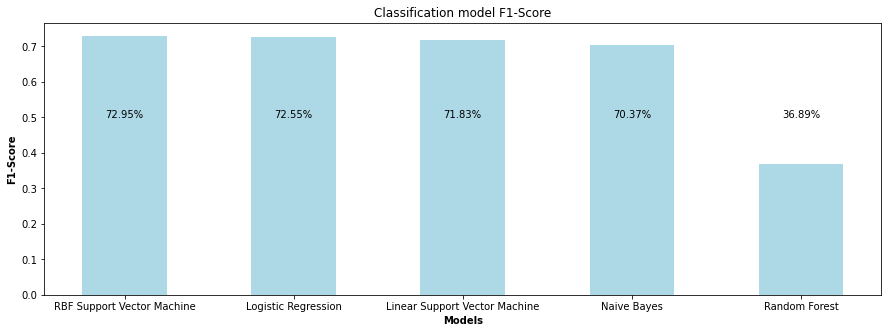

In [91]:
# setting figure size by using figure() function 
plt.figure(figsize = (15,5))
      
x = ["RBF Support Vector Machine", "Logistic Regression","Linear Support Vector Machine", "Naive Bayes", "Random Forest"]
y = results["F1-Score"].sort_values(ascending=False)

# making the bar chart on the data
plt.bar(x, y, color="lightblue", width=0.5)
      
# calling the function to add value labels
addlabels(x, y)
      
# giving title to the plot
plt.title("Classification model F1-Score")
      
# giving X and Y labels
plt.xlabel("Models",fontweight ='bold')
plt.ylabel("F1-Score",fontweight ='bold')
      
# visualizing the plot
plt.show()

As we can see from the graph and table above the best performing model was the RBF Support VEctor Machine followed closely by the Logistic Regression model.

These two models will now be have there hyperparameters tuned using a gridsearch to see if they can be improved.

# <h2 align="center">Hyperparameter Tuning:</h2>

Hyperparameter tuning consists of modifying the hyperparameters of a model to see if the model f1-score can be improved. This is done by creating a list of hyperparameters for each model and performing a grid search using these hyperparameters. The grid search trains each model with their respective list of hyperparameters and saves the results of the best performing model and its respective hyperparameters. 

1. Logistic Regression

In [92]:
"""
LR_parameters = {'clf__C': (0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10),
                'clf__solver': ("ibfgs", "saga"),}

gs_LR = GridSearchCV(train_LR, LR_parameters, n_jobs=-1)
gs_LR = gs_LR.fit(X_train, y_train)

gs_LR.best_params_                
"""

'\nLR_parameters = {\'clf__C\': (0.01, 0.1, 0.5, 1, 2, 3, 4, 5),\n                \'clf__solver\': ("ibfgs", "saga"),}\n\ngs_LR = GridSearchCV(train_LR, LR_parameters, n_jobs=-1)\ngs_LR = gs_LR.fit(X_train, y_train)\n\ngs_LR.best_params_                \n'

According to the grid search performed above the ideal hyperparameters for the Linear Regression model is:

- solver = 'saga'
- C      =  5

A new model is now trained below with the new hyperparameters:

In [93]:
# Create LR pipeline and fit data
tuned_LR = Pipeline([('vect', CountVectorizer(lowercase=True,
                                              stop_words='english',
                                              tokenizer=LemmaTokenizer(),
                                              analyzer='word',
                                              ngram_range=(1, 2),
                                              min_df=3,
                                              max_df=0.7,
                                              max_features=100000)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression(C=5,
                                                multi_class='ovr',
                                                solver= 'saga',
                                                max_iter=100000)),])

tuned_LR = tuned_LR.fit(X_train, y_train)

2. Support Vector Machines

In [94]:
"""
SVM_parameters = {'clf__C': (0.01 ,0.1, 0.5, 1, 2, 3, 4, 5),
                  'clf__kernel': ("rbf", "linear"),
                  'clf__gamma': (0.01, 0.1, 0.5, 1, 2, 3),}

gs_SVM = GridSearchCV(train_SVM, SVM_parameters, n_jobs=-1)
gs_SVM = gs_SVM.fit(X_train, y_train)

gs_SVM.best_params_
"""

'\nSVM_parameters = {\'clf__C\': (0.01 ,0.1, 0.5, 1, 2, 3, 4, 5),\n                  \'clf__kernel\': ("rbf", "linear"),\n                  \'clf__gamma\': (0.01, 0.1, 0.5, 1, 2, 3),}\n\ngs_SVM = GridSearchCV(train_SVM, SVM_parameters, n_jobs=-1)\ngs_SVM = gs_SVM.fit(X_train, y_train)\n\ngs_SVM.best_params_\n'

According to the grid search performed above the ideal parameters for the SVM model is:

- Kernal = 'rbf'
- C      =  5
- gamma  =  0.5

A new model is now trained below with the new hyperparameters:

In [95]:
# Create SVC pipeline and fit data with adjuisted hyperparameters
tuned_SVM = Pipeline([('vect', CountVectorizer(lowercase=True,
                                              stop_words='english',
                                              tokenizer=LemmaTokenizer(),
                                              analyzer='word',
                                              ngram_range=(1, 2),
                                              min_df=3,
                                              max_df=0.7,
                                              max_features=100000)),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SVC(kernel='rbf',
                                  C=5,
                                  gamma=0.5,
                                  random_state=42)),])

tuned_SVM = tuned_SVM.fit(X_train, y_train)

Once the new models have been trained. The results are inputed in to a table and graph that shows the new classification metrics from the tuned model as well as the classification metrics from the untuned model. 

In [96]:
# Create list of used classifiers and their names
new_names = ["Tuned Logistic Regression", "Untuned Logistic Regression", "Tuned Support Vector Machine", "Untuned RBF Support Vector Machine"]
new_classifiers = [tuned_LR, train_LR, tuned_SVM, train_SVM_rbf]

# Save results to new list
new_results = []

for name, clf in zip(new_names, new_classifiers):    
      
    y_pred_test = clf.predict(X_test)
    
    accuracy  = metrics.accuracy_score(y_test, y_pred_test)
    precision = metrics.precision_score(y_test, y_pred_test, average='weighted')
    recall    = metrics.recall_score(y_test, y_pred_test, average='weighted')
    f1        = metrics.f1_score(y_test, y_pred_test, average='weighted')    
    
    new_results.append([name, accuracy, precision, recall, f1])

    
new_results = pd.DataFrame(new_results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
new_results.set_index('Classifier', inplace= True)

In [97]:
# Show results in table form
new_results.sort_values('F1-Score', ascending=False)

,Accuracy,Precision,Recall,F1-Score
Classifier,,,,
Tuned Support Vector Machine,0.736671,0.728881,0.736671,0.729897
Untuned RBF Support Vector Machine,0.742035,0.736301,0.742035,0.729505
Tuned Logistic Regression,0.734883,0.726581,0.734883,0.723337
Untuned Logistic Regression,0.732607,0.724915,0.732607,0.718283


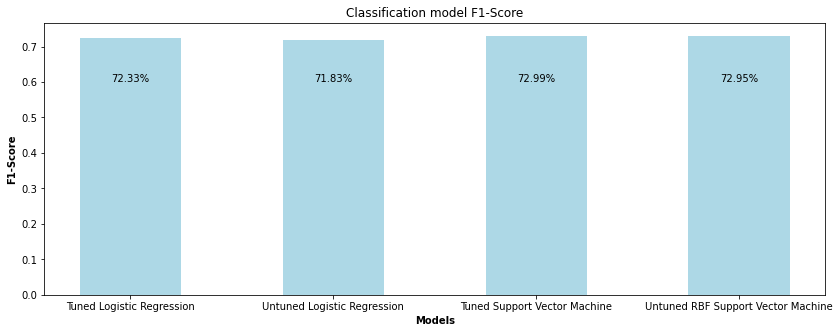

In [98]:
# function to add value labels
def addlabels(x, y):
    for i in range(len(x)):
        string = round(y[i]*100,2).astype(str)+"%"
        plt.text(i, 0.6, string, ha = 'center')

# setting figure size by using figure() function 
plt.figure(figsize = (14,5))
      
x = ["Tuned Logistic Regression", "Untuned Logistic Regression", "Tuned Support Vector Machine", "Untuned RBF Support Vector Machine"]
y = new_results["F1-Score"]

# making the bar chart on the data
plt.bar(x, y, color="lightblue", width=0.5)
      
# calling the function to add value labels
addlabels(x, y)
      
# giving title to the plot
plt.title("Classification model F1-Score")
      
# giving X and Y labels
plt.xlabel("Models",fontweight ='bold')
plt.ylabel("F1-Score",fontweight ='bold')
      
# visualizing the plot
plt.show()

As we can see in the graph and table above. The Logistic Regression model improved by 0.5% and the Support Vector Machine model improved by 0.04%.
Based on the results above the best model that was produced was the tuned SVM model which has a f1-score of 72.99%

In [104]:
# Predict test set using new tuned SVM model and show the classification metrics
y_pred_SVM_tuned = tuned_SVM.predict(X_test)
print(metrics.classification_report(y_test, y_pred_SVM_tuned))

              precision    recall  f1-score   support

          -1       0.69      0.54      0.61       516
           0       0.59      0.47      0.52      1095
           1       0.77      0.85      0.81      3254
           2       0.77      0.75      0.76      1287

    accuracy                           0.74      6152
   macro avg       0.70      0.65      0.67      6152
weighted avg       0.73      0.74      0.73      6152



# <h2 align="center">Kaggle Submission:</h2>

In [105]:
test = pd.read_csv("resources/test.csv")
test_pred = tuned_SVM.predict(test['message'])
output = pd.DataFrame({"tweetid":test["tweetid"],'sentiment': test_pred})
output.to_csv("submission.csv", index = False)
output

,tweetid,sentiment
0,169760,2
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,0
10542,875167,1
10543,78329,0
10544,867455,0


# <h2 align="center">Saving to Comet:</h2>

In [100]:
"""
# Create dictionaries for the data we want to log
f1 = f1_score(y_test, y_pred_LR_tuned,average='weighted')
recall = recall_score(y_test, y_pred_LR_tuned,average='weighted')
precision = precision_score(y_test, y_pred_LR_tuned,average='weighted')

params = {"random_state": 42,
          "model_type": "Linear Regression",
          "stratify": True
          }
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

"""

'\n# Create dictionaries for the data we want to log\nf1 = f1_score(y_test, y_pred_LR_tuned,average=\'weighted\')\nrecall = recall_score(y_test, y_pred_LR_tuned,average=\'weighted\')\nprecision = precision_score(y_test, y_pred_LR_tuned,average=\'weighted\')\n\nparams = {"random_state": 42,\n          "model_type": "Linear Regression",\n          "stratify": True\n          }\nmetrics = {"f1": f1,\n           "recall": recall,\n           "precision": precision\n           }\n\n# Log our parameters and results\nexperiment.log_parameters(params)\nexperiment.log_metrics(metrics)\n\n'

End and display Comet experiment

In [101]:
#experiment.end()
#experiment.display()

# <h2 align="center">Resources:</h2>

https://towardsdatascience.com/effectively-pre-processing-the-text-data-part-1-text-cleaning-9ecae119cb3e"